<a href="https://colab.research.google.com/github/pranavgupta0001/yorkUCourses/blob/main/phys4060/phys4060_esse4020_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import periodogram

[ 1.   2.5  4.   5.5  7.   8.5 10. ]
1.75
[15.    1.5   6.    3.75  8.25 10.5  12.75]
2.4


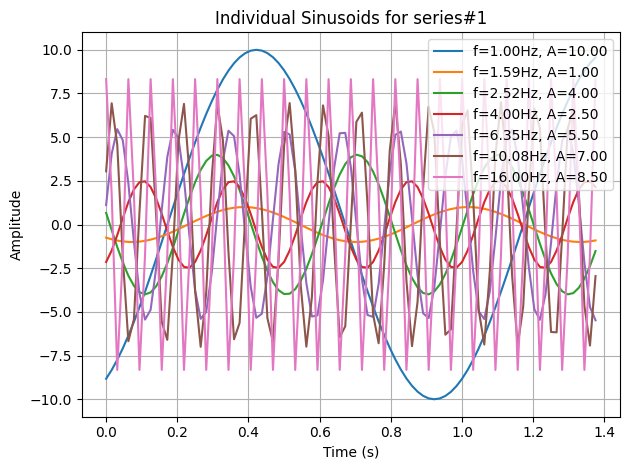

,Frequency (Hz),Amplitude,Phase (radians)
0,1.000000,10.0,5.201502
1,1.587401,1.0,3.991163
2,2.519842,4.0,2.974057
3,4.000000,2.5,5.252267
4,6.349604,5.5,0.203987
5,10.079368,7.0,0.449932
6,16.000000,8.5,1.365853


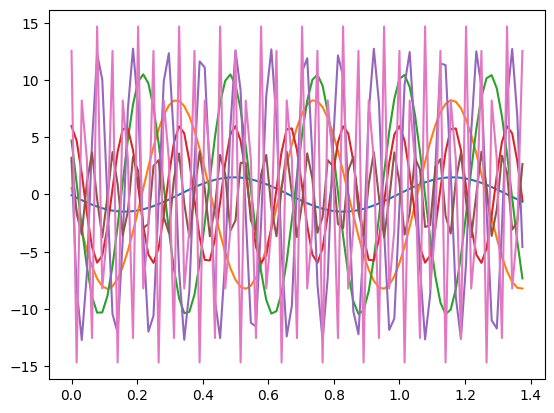

In [141]:
# Define sinusoid parameters
np.random.seed(52)

# Number of sinusoids
num_sinusoids = 7

# Frequencies (at least four octaves wide)
frequencies = np.logspace(0, 4, num_sinusoids, base=2)

# Amplitudes (ratio of largest to smallest amplitude is at least 10)
amplitudes = np.linspace(1, 10, num_sinusoids)
# define the noise
noise_amplitude = amplitudes[0]+ (amplitudes[1] - amplitudes[0]) / 2
print(amplitudes)
print(noise_amplitude)
# shuffle the amplitudes
np.random.shuffle(amplitudes)

# Phases
phases = np.random.uniform(0, 2*np.pi, num_sinusoids)

# Sampling interval delta, ∆
Tmin = 1 / frequencies[-1]  # period of the wave with the smallest period
delta = 0.25 * Tmin

# Time vector (slightly longer than the largest period)
Tmax = 1 / frequencies[0]  # period of the wave with the largest period
t = np.arange(0, Tmax + 25*delta, delta)



############2
# Frequencies (at least four octaves wide)
frequencies2 = 1.5*frequencies#np.logspace(0, 4, num_sinusoids, base=2)

# Amplitudes (ratio of largest to smallest amplitude is at least 10)
amplitudes2 = 1.5*amplitudes#np.linspace(1.5, 15, num_sinusoids)
# define the noise
noise_amplitude2 =amplitudes2[1]+ (amplitudes2[3] - amplitudes2[1]) / 2.5
print(amplitudes2)
print(noise_amplitude2)
np.random.shuffle(amplitudes2)

# Phases
phases2 = np.random.uniform(0, 2*np.pi, num_sinusoids)

# Sampling interval delta, ∆
Tmin2 = 1 / frequencies2[-1]  # period of the wave with the smallest period
delta2 = 0.25 * Tmin2

# Time vector (slightly longer than the largest period)
Tmax2 = 1 / frequencies2[0]  # period of the wave with the largest period
t2 = np.arange(0, Tmax2 + 25*delta2, delta2)

if len(t2)>len(t):
  t=t2
else:
  t2=t




############



# Generate sinusoids
sinusoids = []
for i in range(num_sinusoids):
    sinusoid = amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i])
    sinusoids.append(sinusoid)
    plt.plot(t, sinusoid, label=f'f={frequencies[i]:.2f}Hz, A={amplitudes[i]:.2f}')

plt.title('Individual Sinusoids for series#1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Generate sinusoids
sinusoids2 = []
for i in range(num_sinusoids):
    sinusoid2 = amplitudes2[i] * np.sin(2 * np.pi * frequencies2[i] * t2 + phases2[i])
    sinusoids2.append(sinusoid2)
    plt.plot(t2, sinusoid2, label=f'f={frequencies2[i]:.2f}Hz, A={amplitudes2[i]:.2f}')



# Table with the characteristics of the waves
wave_characteristics = pd.DataFrame({
    'Frequency (Hz)': frequencies,
    'Amplitude': amplitudes,
    'Phase (radians)': phases
})
wave_characteristics

In [126]:
noise_amplitude2, noise_amplitude

(2.4, 1.75)

In [142]:
#add a linear trend and random noise to each series
# Linear trend
slope1 = 10.52
slope2 = -10.71
intercept1 = 25
intercept2 = 52
linear_trend1 = slope1 * t + intercept1
linear_trend2 = slope2 * t2 + intercept2

# Random noise (between the two smallest amplitudes)
l = 5
noise1 = np.random.uniform(-l*noise_amplitude, l*noise_amplitude, len(t))

noise2 = np.random.uniform(-l*noise_amplitude2, l*noise_amplitude2, len(t2))

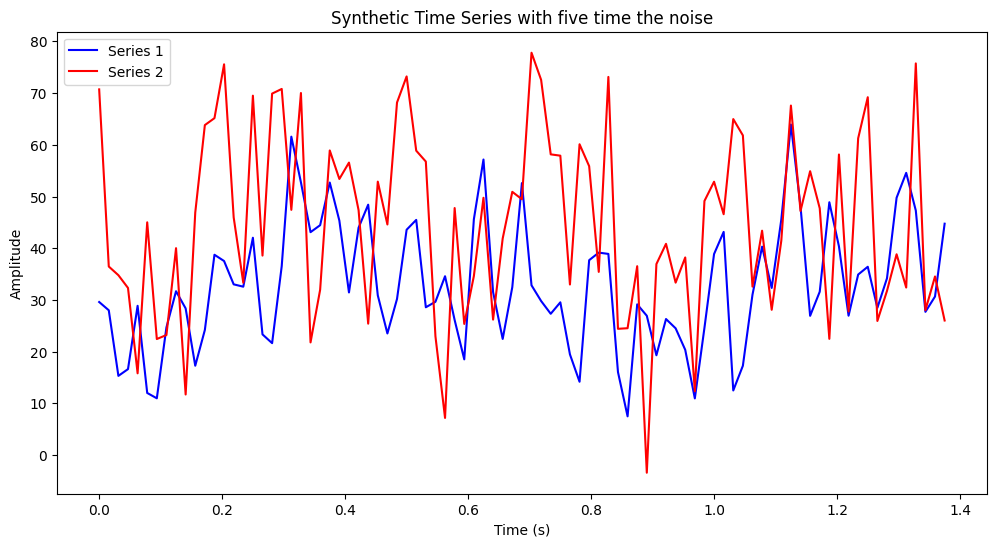

In [146]:
# Combine sinusoids, linear trend, and noise
series1 = sum(sinusoids)    + linear_trend1+ noise1
series2 = sum(sinusoids2)  + linear_trend2+ noise2

# Plotting
plt.figure(figsize=(12, 6))

#plt.subplot(2, 1, 1)
plt.plot(t, series1, label='Series 1', color='blue')
plt.title('Synthetic Time Series with five time the noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
#plt.grid(True)

#plt.subplot(2, 1, 2)
plt.plot(t, series2, label='Series 2', color='red')
# plt.title('Synthetic Time Series 2')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
#plt.grid(True)
plt.legend()
#plt.tight_layout()
plt.show()

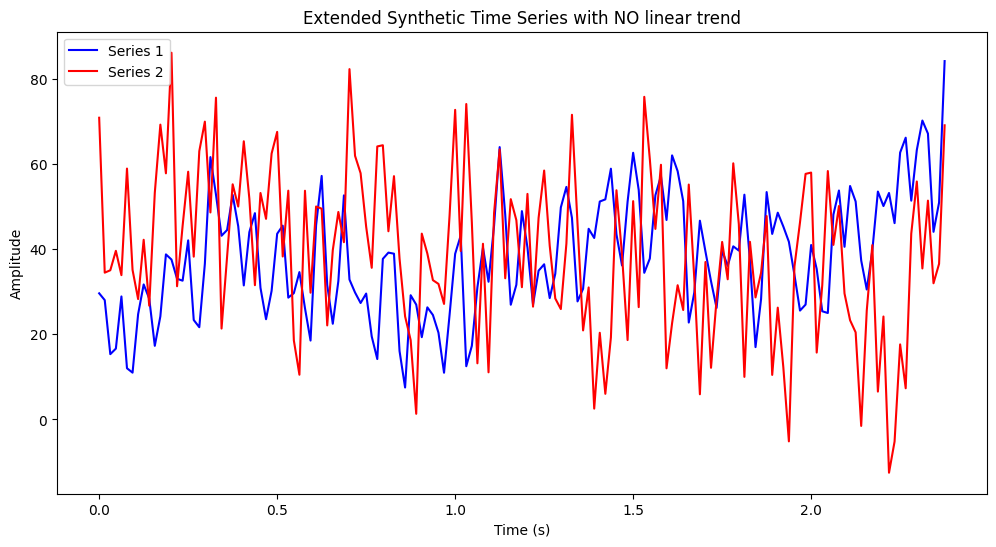

In [140]:
# Combine sinusoids, linear trend, and noise
#seriesE1 = sum(sinusoids)   + noise1 + linear_trend1
#seriesE2 = sum(sinusoids2)  + noise2 + linear_trend2
# Plotting
plt.figure(figsize=(12, 6))
#tE = t
#tE2 = t2
#plt.subplot(2, 1, 1)
plt.plot(tE, seriesE1, label='Series 1', color='blue')
plt.title('Extended Synthetic Time Series with NO linear trend')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
#plt.grid(True)

#plt.subplot(2, 1, 2)
plt.plot(tE2, seriesE2, label='Series 2', color='red')
# plt.title('Synthetic Time Series 2')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
#plt.grid(True)
plt.legend()
#plt.tight_layout()
plt.show()

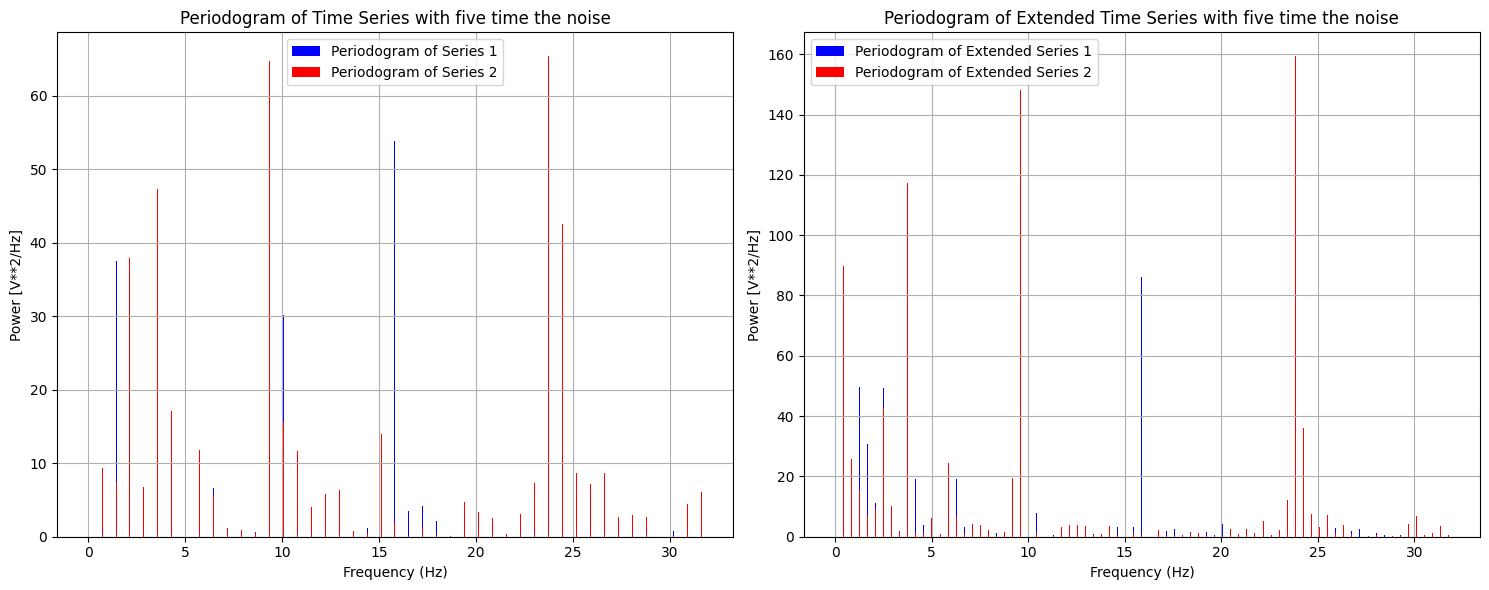

In [147]:
# Calculate the periodogram for the original series
frequencies1, Pxx_den1 = periodogram(series1, fs=1/delta)
frequencies2, Pxx_den2 = periodogram(series2, fs=1/delta)
# Calculate the periodogram for the extended series
frequencies_extended1, Pxx_den_extended1 = periodogram(seriesE1, fs=1/delta)
frequencies_extended2, Pxx_den_extended2 = periodogram(seriesE2, fs=1/delta)

# Plot the periodograms as bar graphs for comparison
plt.figure(figsize=(15, 6))

# Original Series Periodogram
plt.subplot(1, 2, 1)
plt.bar(frequencies1, Pxx_den1, width=0.05, label='Periodogram of Series 1', color='blue')
plt.bar(frequencies2, Pxx_den2, width=0.05, label='Periodogram of Series 2', color='red')
plt.title('Periodogram of Time Series with five time the noise')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power [V**2/Hz]')
plt.legend()
plt.grid(True)

# Extended Series Periodogram
plt.subplot(1, 2, 2)
plt.bar(frequencies_extended1, Pxx_den_extended1, width=0.05, label='Periodogram of Extended Series 1', color='blue')
plt.bar(frequencies_extended2, Pxx_den_extended2, width=0.05, label='Periodogram of Extended Series 2', color='red')
plt.title('Periodogram of Extended Time Series with five time the noise')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power [V**2/Hz]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

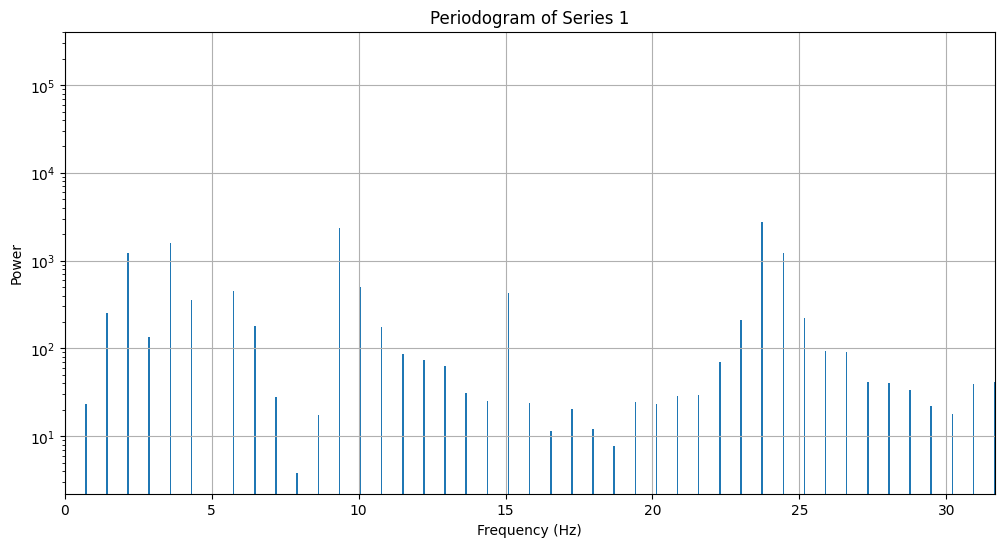

In [68]:
def compute_periodogram(series, delta):
    """Computes the periodogram of a time series."""
    # Compute FFT
    n = len(series)
    fft_values = np.fft.fft(series)
    # Compute frequencies
    frequencies = np.fft.fftfreq(n, d=delta)
    # Compute periodogram (squared magnitude of FFT values)
    periodogram = np.abs(fft_values) ** 2 / len(series)
    return frequencies, periodogram

# Compute periodogram for series1
frequencies1, periodogram1 = compute_periodogram(series2, delta)

# Display the periodogram
plt.figure(figsize=(12, 6))
plt.bar(frequencies1, periodogram1, width=0.05)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Periodogram of Series 1")
plt.yscale("log")
plt.xlim(0, max(frequencies1))
plt.grid(True)
plt.show()
